In [247]:
import os
import sys
import glob
import math
from functools import reduce
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#### Checkig the GC content

In [78]:
indir = "Results/GC_content/Archaea/*/*_gc_content.tsv"
filenames = glob.glob(indir)
filenames[:5]

['Results/GC_content/Archaea/Unclassified/Unclassified_gc_content.tsv',
 'Results/GC_content/Archaea/TACK/TACK_gc_content.tsv',
 'Results/GC_content/Archaea/Environmental/Environmental_gc_content.tsv',
 'Results/GC_content/Archaea/DPANN/DPANN_gc_content.tsv',
 'Results/GC_content/Archaea/Other/Other_gc_content.tsv']

In [79]:
dfs = []
for filename in filenames:
    name = filename.split("/")[3]
    df = pd.read_csv(filename, 
                     sep="\t", 
                     names=["Id", "GC"], 
                     dtype={"Id": str, "GC": np.float64})
    df[name] = name
    df = df.rename(columns={name: "Group"})
    dfs.append(df)

In [80]:
dfs[0]

,Id,GC,Group
0,GCA_000805915.1,0.427544,Unclassified
1,GCA_000805925.1,0.429531,Unclassified
2,GCA_000805935.1,0.421646,Unclassified
3,GCA_000805965.1,0.284321,Unclassified
4,GCA_000805995.1,0.341428,Unclassified
...,...,...,...
326,GCA_024707025.1,0.387854,Unclassified
327,GCA_024707065.1,0.384348,Unclassified
328,GCA_902812485.1,0.460803,Unclassified
329,GCA_902812495.1,0.441302,Unclassified


In [81]:
gc = pd.concat(dfs, axis=0, names=["Id", "GC", "Group"])
gc.head(5)

,Id,GC,Group
0,GCA_000805915.1,0.427544,Unclassified
1,GCA_000805925.1,0.429531,Unclassified
2,GCA_000805935.1,0.421646,Unclassified
3,GCA_000805965.1,0.284321,Unclassified
4,GCA_000805995.1,0.341428,Unclassified


In [205]:
gc = gc.replace('_', '.', regex=True)

In [206]:
gc.tail(5)

,Id,GC,Group
27,GCA.020356125.1,0.323478,Cand.Thermoplasmota
28,GCA.900083515.1,0.372957,Cand.Thermoplasmota
29,GCA.900090055.1,0.371606,Cand.Thermoplasmota
30,GCA.902383905.1,0.412554,Cand.Thermoplasmota
31,GCA.902387285.1,0.555947,Cand.Thermoplasmota


In [207]:
gc.groupby("Group")["GC"].mean()

Group
Asgard                 0.355428
Cand.Thermoplasmota    0.446007
DPANN                  0.397397
Environmental          0.430362
Euryarchaeota          0.537774
Other                  0.483834
TACK                   0.419034
Unclassified           0.406713
Name: GC, dtype: float64

In [208]:
gc["GC"].mean(), gc.shape

(0.4498734315882094, (2273, 3))

In [222]:
x = gc.index
y = gc["GC"].values
labels = set(gc["Group"])

In [225]:
len(gc["Group"])

2273

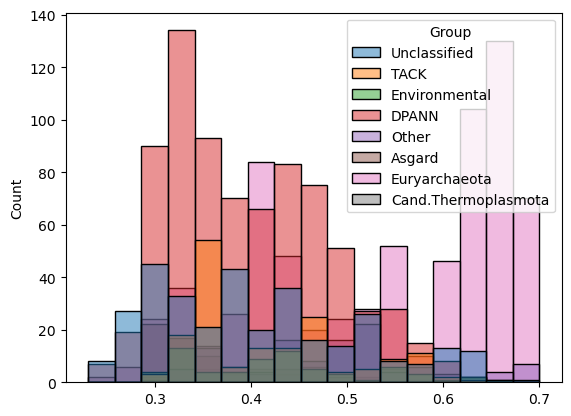

In [227]:
sns.histplot(data=gc, x=y, hue="Group", alpha=0.5)
plt.show()

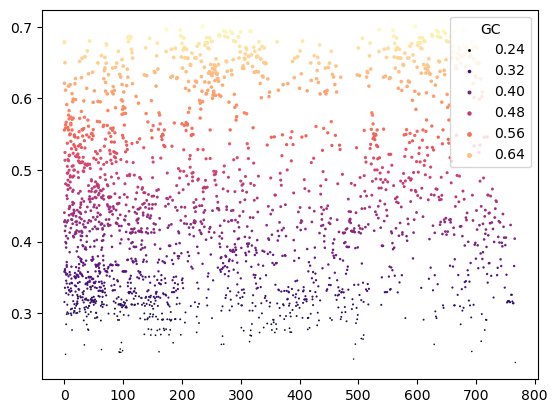

In [89]:
sns.scatterplot(x=x, y=y,
                hue="GC", size="GC",
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=gc)
plt.show()

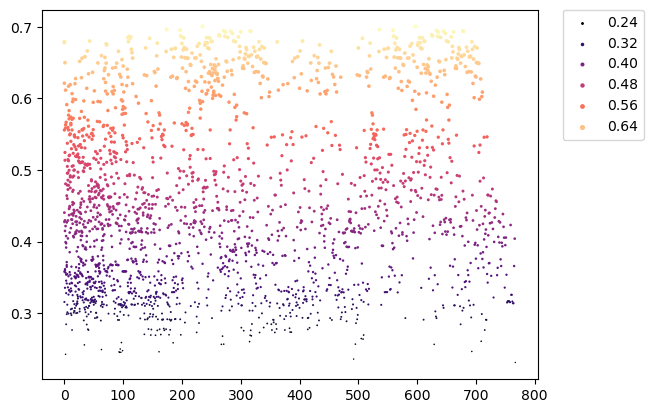

In [90]:
sns.scatterplot(x=x, y=y,
                hue="GC", size="GC",
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=gc)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

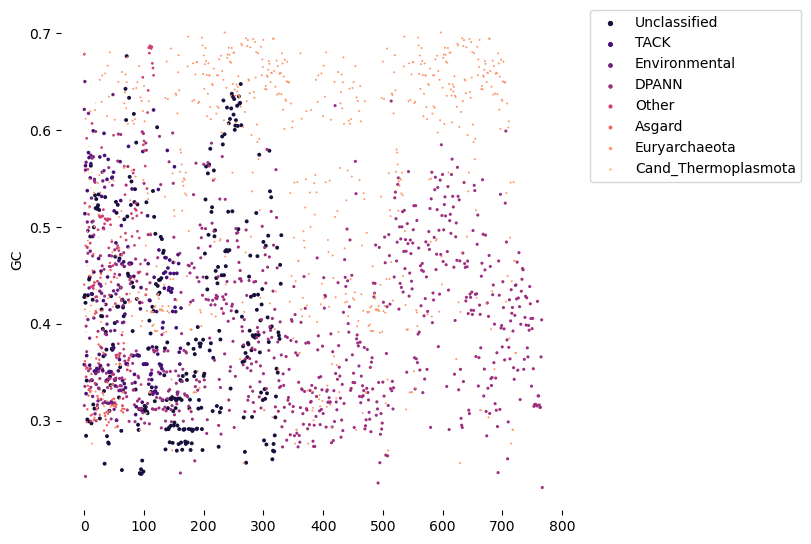

In [103]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=x, y="GC",
                hue="Group", size="Group",
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=all_len, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.grid()
plt.show()

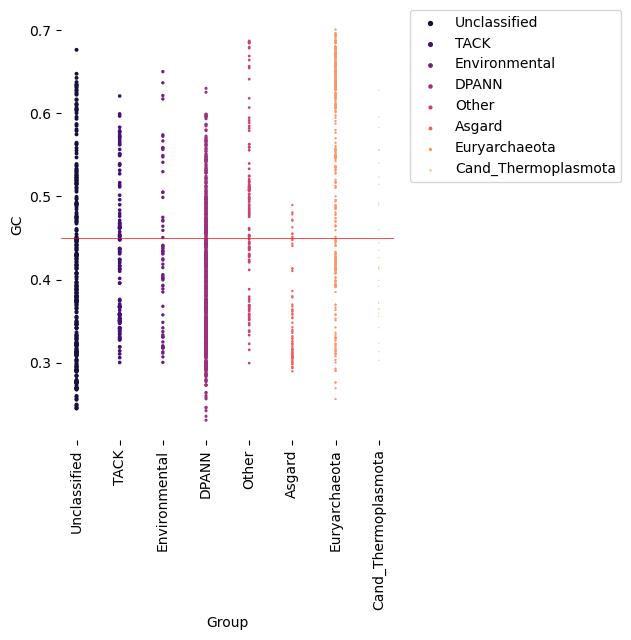

In [121]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Group", y="GC",
                hue="Group", size="Group",
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=all_len, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(gc["GC"].mean(), c='red', ls='-', lw=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

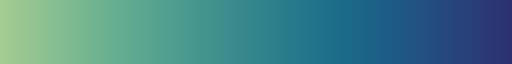

In [75]:
sns.color_palette("crest", as_cmap=True)

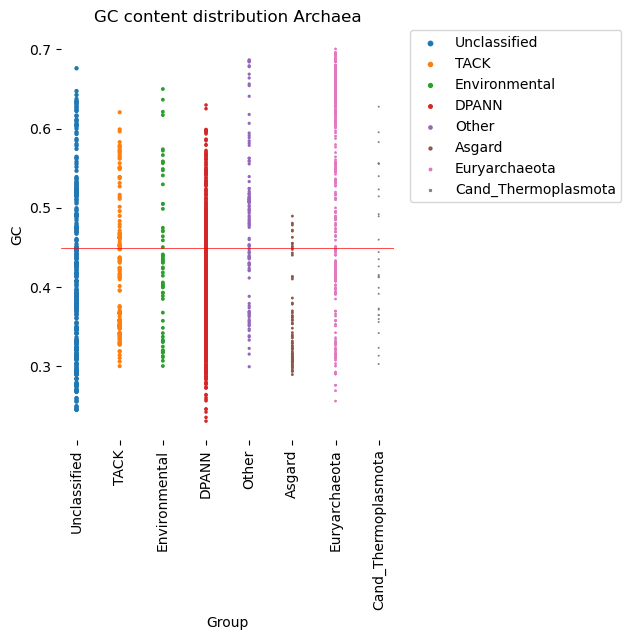

In [119]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Group", y="GC",
                hue="Group", size="Group",
                palette="tab10",
                sizes=(2, 10), linewidth=0,
                data=all_len, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(gc["GC"].mean(), c='red', ls='-', lw=0.5)
plt.title("GC content distribution Archaea")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [123]:
indir1 = "Results/Lengths/Archaea/*_chr_lengths.tsv"
filenames1 = glob.glob(indir1)
filenames1[:5]

['Results/Lengths/Archaea/Asgard_chr_lengths.tsv',
 'Results/Lengths/Archaea/TACK_chr_lengths.tsv',
 'Results/Lengths/Archaea/Euryarchaeota_chr_lengths.tsv',
 'Results/Lengths/Archaea/Other_chr_lengths.tsv',
 'Results/Lengths/Archaea/Cand_Thermoplasmota_chr_lengths.tsv']

In [128]:
length = []

for filename in filenames1:
    name = filename.split("/")[-1].replace("_chr_lengths.tsv", "")
    df = pd.read_csv(filename, 
                     sep="\t", 
                     names=["Id", "length"], 
                     dtype={"Id": str, "length": np.float64})
    df[name] = name
    df = df.rename(columns={name: "Group"})
    length.append(df)

In [130]:
len_seqs = pd.concat(length, axis=0, names=["Id", "Length", "Group"])
len_seqs.head(5)

,Id,length,Group
0,GCA_001940655.1,4334170.0,Asgard
1,GCA_003144275.1,3948260.0,Asgard
2,GCA_003345545.1,2688080.0,Asgard
3,GCA_005191415.1,3840020.0,Asgard
4,GCA_005223125.1,4129784.0,Asgard


In [131]:
len_seqs.tail(5)

,Id,length,Group
763,GCA_023659955.1,563912.0,DPANN
764,GCA_023659975.1,779153.0,DPANN
765,GCA_023898345.1,1540096.0,DPANN
766,GCA_023898365.1,1131583.0,DPANN
767,GCA_920984865.1,607503.0,DPANN


In [161]:
len_seqs.groupby("Group")["length"].mean()

Group
Asgard                 3.483286e+06
Cand_Thermoplasmota    2.100839e+06
DPANN                  9.206823e+05
Environmental          1.386753e+06
Euryarchaeota          2.816000e+06
Other                  1.811334e+06
TACK                   2.073122e+06
Unclassified           1.354260e+06
Name: length, dtype: float64

In [165]:
g1 = pd.DataFrame(len_seqs.groupby("Group")["length"].mean()).reset_index()

In [166]:
g2 = pd.DataFrame(gc.groupby("Group")["GC"].mean())

In [175]:
g = pd.merge(g1, g2, on="Group").sort_values("GC")

In [176]:
g

,Group,length,GC
0,Asgard,3.483286e+06,0.355428
2,DPANN,9.206823e+05,0.397397
7,Unclassified,1.354260e+06,0.406713
6,TACK,2.073122e+06,0.419034
3,Environmental,1.386753e+06,0.430362
1,Cand_Thermoplasmota,2.100839e+06,0.446007
5,Other,1.811334e+06,0.483834
4,Euryarchaeota,2.816000e+06,0.537774


In [140]:
df = pd.merge(gc, len_seqs, on=["Id", "Group"])

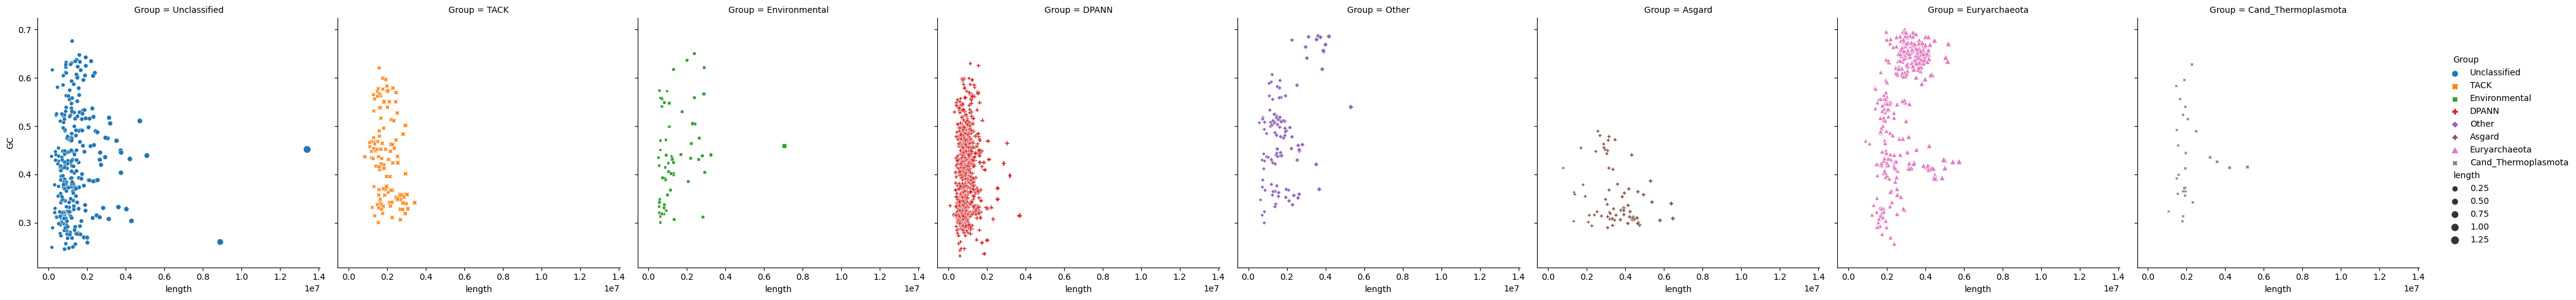

In [141]:
sns.relplot(
    data=df,
    x="length", y="GC", col="Group",
    hue="Group", style="Group", size="length",
)

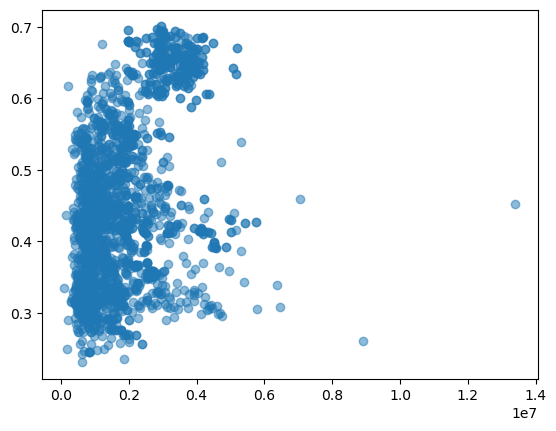

In [147]:
plt.scatter(x=df["length"], y=df["GC"], alpha=0.5)
plt.show()

In [181]:
x = df["length"]/100000

In [229]:
y = df["GC"].values

In [230]:
y

array([0.427544, 0.429531, 0.421646, ..., 0.372957, 0.371606, 0.412554])

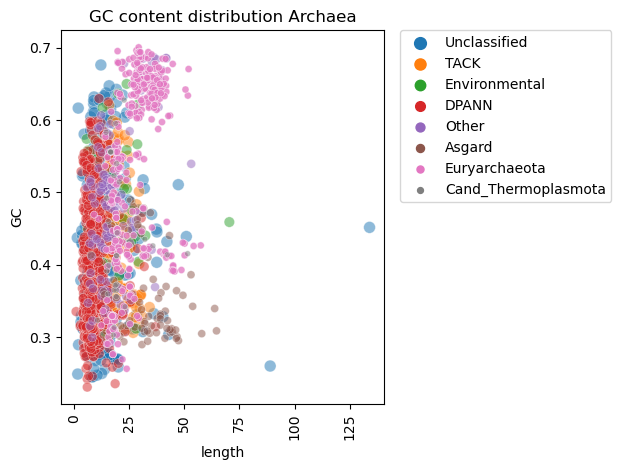

In [187]:
sns.scatterplot(x=x,
                y="GC",
                hue="Group", 
                size="Group", 
                data=df, 
                alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("GC content distribution Archaea")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [228]:
from sklearn.linear_model import LinearRegression

In [236]:
x1 = np.array(df["length"]).reshape((-1, 1))

In [237]:
# create a model
model = LinearRegression()

# fit the model
model.fit(x1, y)

LinearRegression()

In [240]:
r_sq = model.score(x1, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.17722526646794723
intercept: 0.37084804589404324
slope: [4.33093063e-08]


In [241]:
new_model = LinearRegression().fit(x1, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")
print(f"slope: {new_model.coef_}")

intercept: [0.37084805]
slope: [[4.33093063e-08]]


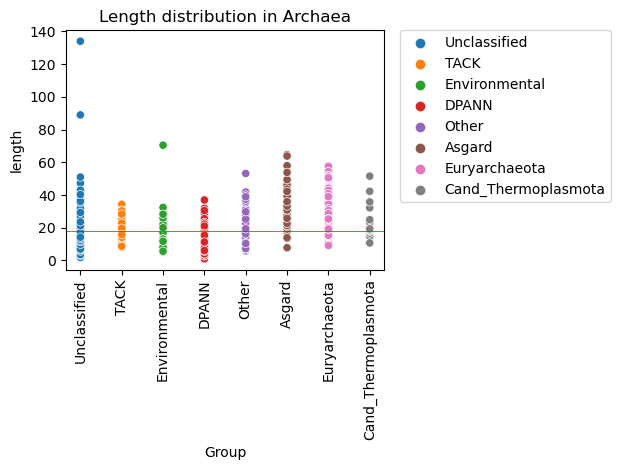

In [197]:
sns.scatterplot(x='Group', y=x, hue="Group", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(x.mean(), c='red', ls='-', lw=0.5)
plt.title("Length distribution in Archaea")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

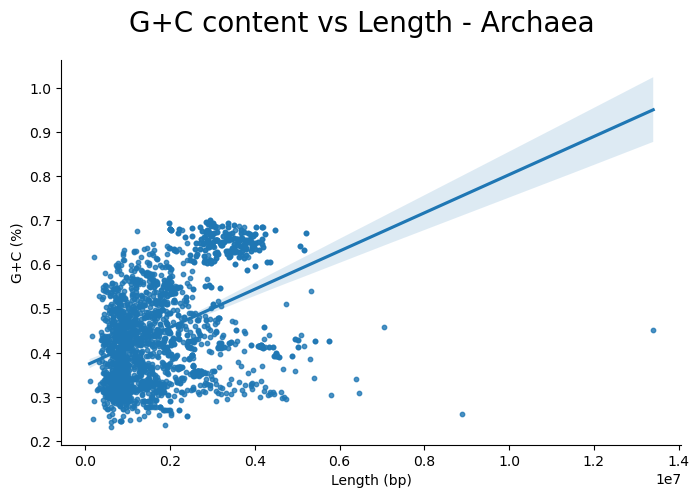

In [264]:
pr = stats.pearsonr(df["length"], df["GC"])
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.regplot(data=df, x="length", y="GC", ax=ax, scatter_kws={'s':10}, scatter=True)
ax.annotate('pearsonr = %.2f;' % pr[0], xy=(1.12e7, 85), fontsize=14)
ax.annotate('p = %.3f' % pr[1], xy=(1.4e7, 85), fontsize=16)
ax.set_xlabel('Length (bp)')
ax.set_ylabel('G+C (%)')
fig.suptitle('G+C content vs Length - Archaea', fontsize=20, color="k")
#matplotlib.pyplot.savefig('Images2/all.png', bbox_inches='tight')
#matplotlib.pyplot.savefig('Images2/all.pdf', format='pdf', dpi=300, bbox_inches='tight')
sns.despine()

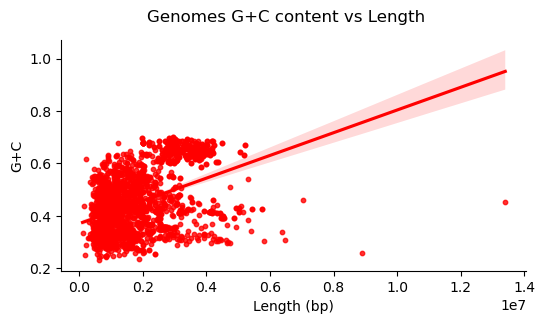

In [275]:
pr = stats.pearsonr(df["length"], df["GC"])
fig, ax = plt.subplots()
fig.set_size_inches(6, 3)
sns.regplot(data=df, x="length", y="GC", ax=ax, color="red", scatter_kws={'s':10})
ax.annotate('pearsonr = %.2f;' % pr[0], xy=(0.63e7, 85), fontsize=10)
ax.annotate('p = %.3f' % pr[1], xy=(0.95e7, 85), fontsize=14)
axes.set_ylim([0,1])
ax.set_xlabel('Length (bp)')
ax.set_ylabel('G+C')
fig.suptitle('Genomes G+C content vs Length', fontsize=12, color="k")
sns.despine()